In [132]:
import statsmodels.api as sm
import numpy as np
import random
import scipy.optimize as spo

In [128]:
ar = [1, 0.5, 0.5]
p = 2
y = sm.tsa.arma_generate_sample(ar,ma=[1], nsample=1000, sigma=0.3)

In [129]:
def likelihood(wrapper):
    """
    here is the conditional likelihood funciton of AR(p) process,
    Specific formula, please refer to:
    http://econ.nsysu.edu.tw/ezfiles/124/1124/img/Chapter17_MaximumLikelihoodEstimation.pdf
    Parmameter
    ----------
    phi: array-like, phi_1, phi_2, ..., phi_p
    sigma: int, the standard deviation of the white noise(normal distribution)
    c: int, constant of the AR(p) process
    """
    phi = np.array([phi_ for phi_ in wrapper[:p]])
    sigma = wrapper[p]
    c = wrapper[p+1]
    
    T = len(y)

    second_part = (T-p) * np.log(sigma)
    resids = 0
    for i in range(p, T):
        resids += (y[i] - c - np.dot(phi, y[i-p: i])) ** 2 
    resids = resids * 0.5 / (sigma ** 2)
    return second_part + resids

In [169]:
# init = [0.5, 0.5, 0.5, 0]
init = np.array([random.random() for _ in range(p+2)])
bounds = ((-1, 1), (-1,1), (0, None), (None, None))
min_result = spo.minimize(likelihood, init, bounds=bounds, tol=1e-9, method='L-BFGS-B')
min_result

      fun: -720.10923862530092
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([ -7.95807864e-05,   7.95807864e-05,  -1.03455022e-03,
         1.25055521e-04])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 110
      nit: 15
   status: 0
  success: True
        x: array([-0.49171337, -0.47846321,  0.29477217, -0.0005881 ])

In [155]:
help(spo.minimize)

Help on function minimize in module scipy.optimize._minimize:

minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
    Minimization of scalar function of one or more variables.
    
    In general, the optimization problems are of the form::
    
        minimize f(x) subject to
    
        g_i(x) >= 0,  i = 1,...,m
        h_j(x)  = 0,  j = 1,...,p
    
    where x is a vector of one or more variables.
    ``g_i(x)`` are the inequality constraints.
    ``h_j(x)`` are the equality constrains.
    
    Optionally, the lower and upper bounds for each element in x can also be
    specified using the `bounds` argument.
    
    Parameters
    ----------
    fun : callable
        Objective function.
    x0 : ndarray
        Initial guess.
    args : tuple, optional
        Extra arguments passed to the objective function and its
        derivatives (Jacobian, Hessian).
    method : str or callable, op

In [137]:
np.array([random.random() for _ in range(p+2)])

array([ 0.54708393,  0.51399379,  0.58934674,  0.6950477 ])

In [86]:
phi_hat = min_result.x[:p]
c_hat = min_result.x[-1]

In [119]:
errors = np.zeros(len(y))
for i in range(p, len(y)):
    errors[i] = y[i] - np.dot(phi_hat, y[i-p: i])

In [123]:
tuple([(0,None), (0,None)])

((0, None), (0, None))

1000

In [100]:
import matplotlib.pyplot as plt
%matplotlib inline

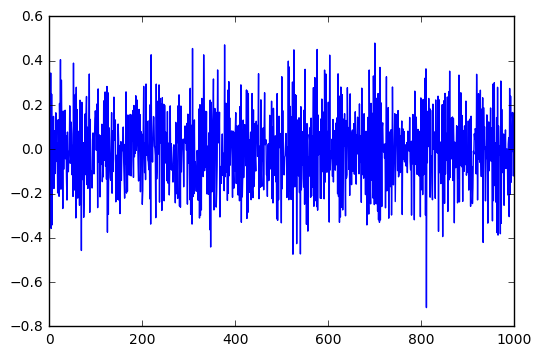

In [105]:
plt.plot(res.fittedvalues)

In [ ]:
sm.tsa.ARMA